-----------------------------------------------------
## Análise de Estacionariedade

#### Este notebook avalia as propriedades de estacionariedade das séries temporais utilizadas no modelo de demanda de energia, aplicando inspeção visual e testes formais de raiz unitária.
-----------------------------------------------------

In [7]:
import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
sys.path.append(str(PROJECT_ROOT))

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

from src.tests import build_stationarity_table, decision_stationarity
from src.config import DATA_INTERIM, RESULTS_TABLES, RESULTS_FIGURES
from src.utils import save_table_as_image

## Testes de estacionariedade

Antes da especificação econométrica, avalia-se a ordem de integração das séries por meio dos testes ADF e KPSS.

O teste ADF tem como hipótese nula a presença de raiz unitária, enquanto o teste KPSS assume estacionariedade sob a hipótese nula. A utilização conjunta permite maior robustez na inferência.

In [9]:
df = pd.read_csv(
    DATA_INTERIM / "base_consolidada_real.csv",
    parse_dates=["date"],
    index_col="date"
)

df.head()

,demanda_energia,importacoes_petroleo,tarifa_energia_real,pib_real
date,,,,
1997-01-01,9455000.0,34.30,467.517793,661414.113517
1997-02-01,9840000.0,40.08,451.042648,603381.980588
1997-03-01,9488000.0,34.76,458.363948,591333.646663
1997-04-01,9945000.0,33.11,458.465453,613852.199952
1997-05-01,10304000.0,34.56,514.909651,649733.762544


## Definição das variáveis do modelo

In [10]:
variables = [
    "demanda_energia",
    "tarifa_energia_real",
    "pib_real",
    "importacoes_petroleo"
]

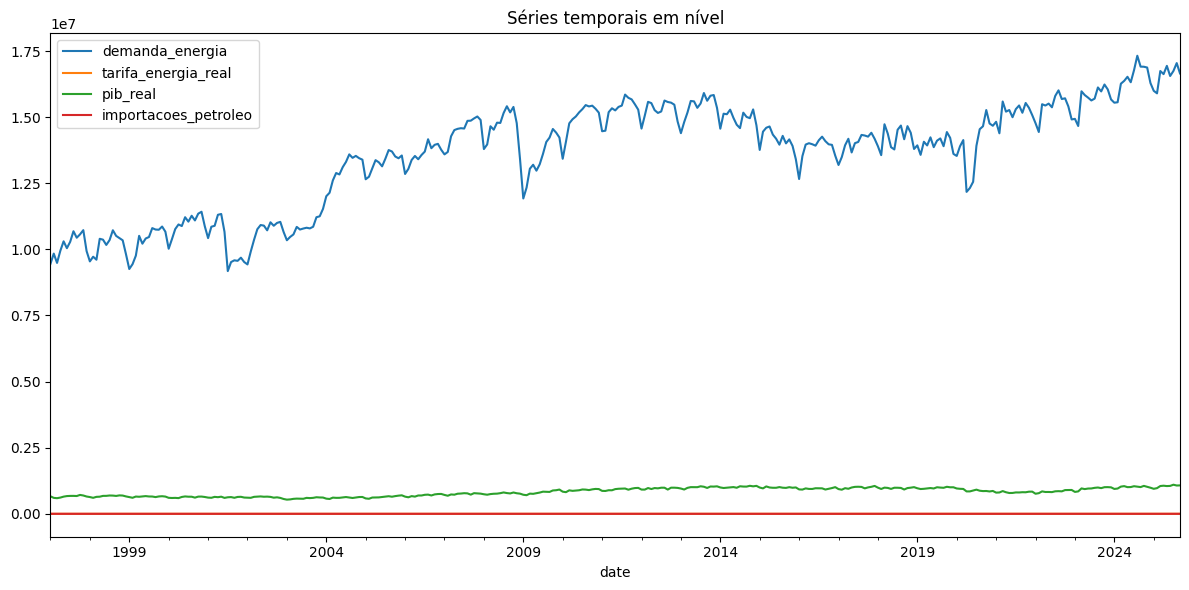

In [11]:
df[variables].plot(
    figsize=(12, 6),
    title="Séries temporais em nível"
)

plt.tight_layout()
plt.show()

In [12]:
table_level = build_stationarity_table(df, variables)

table_level["decisão"] = table_level.apply(
    decision_stationarity,
    axis=1
)

display(table_level)

C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dados\1.0 Projetos GITHUB\energy_demand_brazil\src\tests.py:97: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pvalue, lags, _ = kpss(
C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dados\1.0 Projetos GITHUB\energy_demand_brazil\src\tests.py:97: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pvalue, lags, _ = kpss(
C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dados\1.0 Projetos GITHUB\energy_demand_brazil\src\tests.py:97: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pvalue, lags, _ = kpss(
C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dad

estatistica   p_valor  lags  n_obs  \
variavel             teste                                       
demanda_energia      ADF      -1.224745  0.662862    15  329.0   
                     KPSS      2.179249  0.010000    11    NaN   
importacoes_petroleo ADF      -2.183570  0.212263     1  343.0   
                     KPSS      1.331053  0.010000    11    NaN   
pib_real             ADF      -1.020061  0.745877    13  331.0   
                     KPSS      2.308252  0.010000    11    NaN   
tarifa_energia_real  ADF      -2.264917  0.183533    13  331.0   
                     KPSS      1.284165  0.010000    11    NaN   

                                     decisão  
variavel             teste                    
demanda_energia      ADF    Não estacionária  
                     KPSS   Não estacionária  
importacoes_petroleo ADF    Não estacionária  
                     KPSS   Não estacionária  
pib_real             ADF    Não estacionária  
                     KPSS   Não estacionária  
tarifa_energia_real  ADF    Não estacionária  
                     KPSS   Não estacionária

In [13]:
table_level.to_csv(
    RESULTS_TABLES / "stationarity_level.csv"
)

save_table_as_image(
    table_level,
    filename="stationarity_level.png",
    title="Testes de Estacionariedade – Séries em Nível"
)

In [14]:
df_log = np.log(df[variables])

In [15]:
table_log = build_stationarity_table(df_log, variables)

table_log["decisão"] = table_log.apply(
    decision_stationarity,
    axis=1
)

display(table_log)

C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dados\1.0 Projetos GITHUB\energy_demand_brazil\src\tests.py:97: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pvalue, lags, _ = kpss(
C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dados\1.0 Projetos GITHUB\energy_demand_brazil\src\tests.py:97: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pvalue, lags, _ = kpss(
C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dados\1.0 Projetos GITHUB\energy_demand_brazil\src\tests.py:97: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pvalue, lags, _ = kpss(
C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dad

estatistica   p_valor  lags  n_obs  \
variavel             teste                                       
demanda_energia      ADF      -1.379054  0.592276    15  329.0   
                     KPSS      2.172171  0.010000    11    NaN   
importacoes_petroleo ADF      -1.624133  0.470563     1  343.0   
                     KPSS      1.629402  0.010000    11    NaN   
pib_real             ADF      -1.034195  0.740589    13  331.0   
                     KPSS      2.332673  0.010000    11    NaN   
tarifa_energia_real  ADF      -2.272654  0.180939    13  331.0   
                     KPSS      1.333350  0.010000    11    NaN   

                                     decisão  
variavel             teste                    
demanda_energia      ADF    Não estacionária  
                     KPSS   Não estacionária  
importacoes_petroleo ADF    Não estacionária  
                     KPSS   Não estacionária  
pib_real             ADF    Não estacionária  
                     KPSS   Não estacionária  
tarifa_energia_real  ADF    Não estacionária  
                     KPSS   Não estacionária

In [16]:
table_log.to_csv(
    RESULTS_TABLES / "stationarity_log.csv"
)

save_table_as_image(
    table_log,
    filename="stationarity_log.png",
    title="Testes de Estacionariedade – Séries em Log"
)

In [17]:
df_diff = df[variables].diff().dropna()

In [18]:
table_diff = build_stationarity_table(df_diff, variables)

table_diff["decisão"] = table_diff.apply(
    decision_stationarity,
    axis=1
)

display(table_diff)

C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dados\1.0 Projetos GITHUB\energy_demand_brazil\src\tests.py:97: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pvalue, lags, _ = kpss(
C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dados\1.0 Projetos GITHUB\energy_demand_brazil\src\tests.py:97: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pvalue, lags, _ = kpss(
C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dados\1.0 Projetos GITHUB\energy_demand_brazil\src\tests.py:97: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pvalue, lags, _ = kpss(
C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dad

estatistica       p_valor  lags  n_obs  \
variavel             teste                                           
demanda_energia      ADF      -5.405767  3.294004e-06    14  329.0   
                     KPSS      0.085636  1.000000e-01    18    NaN   
importacoes_petroleo ADF     -11.394299  7.927629e-21     0  343.0   
                     KPSS      0.067218  1.000000e-01     7    NaN   
pib_real             ADF      -3.975665  1.543438e-03    17  326.0   
                     KPSS      0.092259  1.000000e-01    44    NaN   
tarifa_energia_real  ADF      -4.911437  3.313011e-05    12  331.0   
                     KPSS      0.035567  1.000000e-01     4    NaN   

                                 decisão  
variavel             teste                
demanda_energia      ADF    Estacionária  
                     KPSS   Estacionária  
importacoes_petroleo ADF    Estacionária  
                     KPSS   Estacionária  
pib_real             ADF    Estacionária  
                     KPSS   Estacionária  
tarifa_energia_real  ADF    Estacionária  
                     KPSS   Estacionária

In [19]:
table_diff.to_csv(
    RESULTS_TABLES / "stationarity_diff.csv"
)

save_table_as_image(
    table_diff,
    filename="stationarity_diff.png",
    title="Testes de Estacionariedade – Primeira Diferença"
)

## Conclusão

Os resultados indicam que as séries apresentam comportamento não estacionário em nível, tornando-se estacionárias após transformação logarítmica e/ou diferenciação de primeira ordem.

Esses resultados orientam a escolha do modelo econométrico nas etapas seguintes, justificando o uso de modelos com diferenciação ou estrutura dinâmica.